This is an exploration into the data pulled from the New Stellar encounters paper. THis is Gaia DR2 so there is bound to be a difference between this and EDR3. I Calculate the impulse for each object then color the plots with respect to their velocities, transverse velocity,, and radial velocity. 

In [1]:
import sys
!{sys.executable} -m pip install astropy
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scipy
from scipy import optimize
np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision = 40, suppress = True) #prevents scientific notation for 40 character numbers

In [2]:
#loads in table as panda file
dat = Table.read("/Users/edm/Desktop/Gaia data/asu.fits", format='fits')
df = dat.to_pandas()

In [3]:
#looks for gliese 710 (source ID 4270814637616488064)
df.columns
gj = df.loc[df['ID'] == 4270814637616488064]

In [4]:
df.loc[df['ID'] == 4270814637616488064]

,ID,tphmed,dphmed,vphmed,plx,pm,RV,Mass,Gmag,BP-RP,u,Nvis,aen,s_aen,NRVS,RA_ICRS,DE_ICRS,_RA_icrs,_DE_icrs
0,4270814637616488064,1281.4,0.0676,14.52,52.548,0.46,-14.53,0.675,9.06,1.7,1.22,10,0.0,0.0,2,274.961836,-1.938613,274.961836,-1.938613


In [5]:
star = Table.read("/Users/edm/Desktop/Gaia data/asu.fits", format='fits')
star.columns
star

ID,tphmed,dphmed,vphmed,plx,pm,RV,Mass,Gmag,BP-RP,u,Nvis,aen,s_aen,NRVS,RA_ICRS,DE_ICRS,_RA_icrs,_DE_icrs
,kyr,pc,km / s,mas,mas / yr,km / s,Msun,mag,mag,,,mas,mas,,deg,deg,deg,deg
int64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,int16,float64,float64,int16,float64,float64,float64,float64
4270814637616488064,1281.4,0.0676,14.52,52.548,0.460,-14.53,0.675,9.06,1.70,1.22,10,0.00,0.00,2,275.0,-1.9,275.0,-1.9
955098506408767360,-737.4,0.1505,38.47,34.534,0.821,38.52,1.257,12.41,0.76,16.19,10,2.49,1661.28,5,95.1,37.0,95.1,37.0
5571232118090082816,-1162.4,0.2320,82.26,10.229,0.417,82.18,0.815,11.79,1.50,1.25,15,0.00,0.00,10,92.7,-42.8,92.7,-42.8
2946037094755244800,-907.9,0.3376,42.10,25.657,1.339,42.11,nan,12.34,1.49,27.41,10,3.12,4225.87,22,102.7,-17.3,102.7,-17.3
4071528700531704704,437.7,0.3742,44.24,50.430,8.906,-44.50,1.000,12.44,0.78,23.52,10,3.92,3138.25,3,281.9,-28.2,281.9,-28.2
510911618569239040,-2788.4,0.4287,26.50,13.232,0.559,26.45,1.067,8.88,0.77,1.57,17,0.00,0.00,6,20.1,61.9,20.1,61.9
154460050601558656,371.8,0.4436,233.48,11.292,2.155,-233.09,nan,15.37,nan,6.47,10,1.85,359.52,3,72.1,27.0,72.1,27.0
6608946489396474752,-2756.7,0.4907,45.27,7.894,0.670,44.23,0.823,12.28,1.44,0.89,10,0.00,0.00,6,340.5,-28.0,340.5,-28.0


In [6]:
print(star.colnames)

['ID', 'tphmed', 'dphmed', 'vphmed', 'plx', 'pm', 'RV', 'Mass', 'Gmag', 'BP-RP', 'u', 'Nvis', 'aen', 's_aen', 'NRVS', 'RA_ICRS', 'DE_ICRS', '_RA_icrs', '_DE_icrs']


In [7]:
BpRp = np.asarray(star["BP-RP"])

Mass = np.asarray(star["Mass"])
print(Mass)

med_v = np.asarray(star['vphmed'])

med_d = np.asarray(star['dphmed'])

tph = np.asarray(star['tphmed'])

dph = np.asarray(star['dphmed'])

plx = np.asarray(star['plx'])

rv = np.asarray(star['RV'])

pm = np.asarray(star['pm'])


[ 0.675  1.257  0.815    nan  1.     1.067    nan  0.823  1.042  0.796
  0.491  0.545  0.624  0.895    nan  0.979  0.747  0.667  0.962  0.953
  0.468  0.953  0.651  0.748  0.721  0.585  0.759  1.151  1.341    nan
  1.173  1.056  1.346  0.948  0.964  0.996  0.594  1.482  1.074  0.945
  1.058  1.185  0.909  0.842  0.815  0.897  0.98   0.67   1.228  0.935
  0.944  0.77   0.847  0.657  0.646  0.696  1.004  0.332  0.823  0.803
  0.775  0.922  0.908  0.604  0.863  0.849  1.238  0.404  1.233  0.957
  1.042  0.88   0.946  0.886  0.977  0.996  0.687  1.018  0.719  0.637
  0.341  0.664  0.818  0.908  1.098  0.664  0.856  0.87   0.994  0.853
  1.074  0.55   1.127  0.496  0.97   0.956  0.832  0.487  0.878  0.89
  0.668  1.107  1.883  0.689  0.609  0.826  0.75   1.117  0.837  0.962
  0.543  0.884  0.838  0.839  0.904  0.847  0.869  0.813  0.954  0.928
  0.782    nan  0.849  0.973  0.973  0.828  0.843  0.93   0.831  0.776
  0.84   0.489  1.006  0.679  0.789    nan  0.915  0.874  0.732  0.916
  0.715

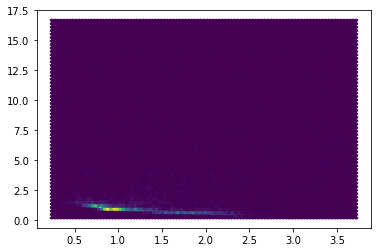

In [8]:
plt.hexbin(BpRp, Mass)

Text(0, 0.5, 'perihelion distance ($d^{med}_{ph}$/pc)')

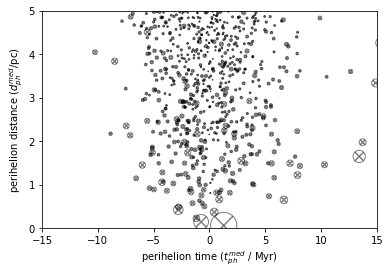

In [9]:
#calculates impulse for objects
import matplotlib.pyplot as plt 
#formula for impulse
area = (Mass)/(med_d*med_v)
plt.scatter(tph/10**3, dph, s = 1000*area, alpha = .5, edgecolor = 'black', facecolor = 'none')
#creates the x within the impulse area to indicate the source location
plt.scatter(tph/10**3, dph, s = 500*area, alpha = .5, edgecolor = 'black', facecolor = 'black', marker = 'x')
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)
plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)")
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)")

Text(0, 0.5, 'perihelion distance ($d^{med}_{ph}$/pc)')

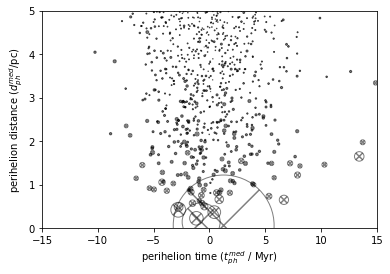

In [10]:
import matplotlib.pyplot as plt 
area = (Mass)/(med_d**2*med_v)
plt.scatter(tph/10**3, dph, s = 1000*area, alpha = .5, edgecolor = 'black', facecolor = 'none')
plt.scatter(tph/10**3, dph, s = 500*area, alpha = .5, edgecolor = 'black', facecolor = 'black', marker = 'x')
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)
#($t^{med}_{ph}$ / Myr) gives subscript and superscript notation
plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)")
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)")

Text(0, 0.5, 'perihelion distance ($d^{med}_{ph}$/pc)')

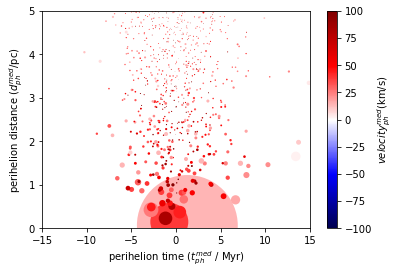

In [11]:
import matplotlib.pyplot as plt 
area = (Mass)/(med_d**2*med_v)
plt.scatter(tph/10**3, dph, s = 1000*area, alpha = 1, edgecolor = 'none', facecolor = 'none', c = med_v, vmin=-100, vmax=100, cmap='seismic')
cbartitle = plt.colorbar()
cbartitle.set_label('$velocity^{med}_{ph}$(km/s)')
#plt.scatter(tph/10**3, dph, s = 500*area, alpha = .5, edgecolor = 'black', facecolor = 'black', marker = 'x')
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)
plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)")
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)")

Text(0, 0.5, 'perihelion distance ($d^{med}_{ph}$/pc)')

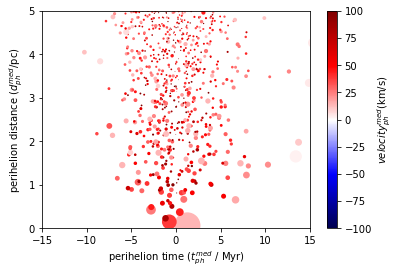

In [12]:
import matplotlib.pyplot as plt 
area = (Mass)/(med_d*med_v)
plt.scatter(tph/10**3, dph, s = 1000*area, alpha = 1, edgecolor = 'none', facecolor = 'none', c = med_v, vmin=-100, vmax=100, cmap='seismic')
cbartitle = plt.colorbar()
cbartitle.set_label('$velocity^{med}_{ph}$(km/s)')
#Titles Colorbar (^ = superscript, _ = subscript)
#plt.scatter(tph/10**3, dph, s = 500*area, alpha = .5, edgecolor = 'black', facecolor = 'black', marker = 'x')
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)
plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)")
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)")

In [13]:
max(area)

0.6876864515796708

In [14]:
np.argmax(area)

3

In [15]:
print(area)

[0.6876864515796708      0.21710837706430813     0.042705215465670986
                     nan 0.060406141903209074    0.09392151185208925
                     nan 0.03704872699037879     0.0256907167096434
 0.02436286826540227     0.01817024508227087     0.012045319145788881
 0.056366273536721925    0.04862503770757736                         nan
 0.024948966043550163    0.025656348453034286    0.0011439329764150357
 0.022590871719210544    0.030207230763395543    0.016995752796002603
 0.029941413453368326    0.02476103502066723     0.009763381912020008
 0.014875646422348853    0.020684444347645763    0.02280210546463
 0.018873831193968762    0.020688132683525696                        nan
 0.01363481064241383     0.010850224793622293    0.019653216732775283
 0.01768031663858165     0.023127738451390593    0.011116101361498858
 0.001982049709341704    0.04435310969243183     0.013384631127899737
 0.010052039064622152    0.011779365622899583    0.018042052368658815
 0.00264191675830471

# Transverse Velocity Objects

In [16]:
#formula for transverse velocity derived from radial and median velocity
v_tan = (med_v**2 - rv**2)**.5
print(v_tan)

[                  nan                   nan   3.627009787690025
                   nan                   nan   1.6271140095273091
  13.489340235904496     9.647797676153901     1.264238901474149
   3.677499150237758     0.9652460826134165    3.372595439716969
                   nan                   nan   9.503141585814747
   6.41899524847932                      nan   7.56756235520936
                   nan   1.2401612798342958    1.8277034770443537
   0.                    4.662274123214968     3.7313804416060523
   1.4805404418658958    1.95437969698826     11.267763753291959
   2.5790502127724775    4.876607427300217    13.057469126901953
                   nan   3.4140298768466963    7.372380890865635
   5.4973539089274395                    nan   6.551908119013864
  11.469659977523511     2.506391828904681     1.2218428704216393
   0.                                    nan   6.189539562843128
                   nan   1.5316657598835162    3.648890242251758
   7.951980885288893  

<ipython-input-16-885f6fe48e8c>:2: RuntimeWarning: invalid value encountered in sqrt
  v_tan = (med_v**2 - rv**2)**.5


In [17]:
#masks transverse velocity for objects greater than 5
v_tan5 = np.ma.masked_greater(v_tan, 5)

Text(0, 0.5, 'perihelion distance ($d_{ph}$/pc)')

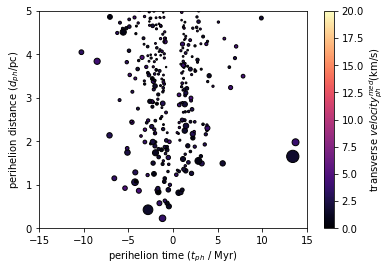

In [18]:
plt.scatter(tph/10**3, dph, s = 1000*area, alpha = 1, edgecolor = 'black', facecolor = 'none', c = v_tan5, vmin=0, vmax=20, cmap='magma')
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)
cbartitle = plt.colorbar()
#titles colorbar and axes
cbartitle.set_label('transverse $velocity^{med}_{ph}$(km/s)')
plt.xlabel("perihelion time ($t_{ph}$ / Myr)")
#$X_{axis}$
plt.ylabel("perihelion distance ($d_{ph}$/pc)")

Text(0, 0.5, 'perihelion distance ($d_{ph}$/pc)')

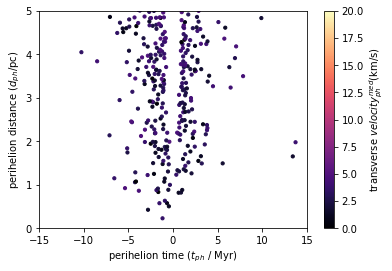

In [19]:
plt.scatter(tph/10**3, dph, s = 10, c = v_tan5, vmin=0, vmax=20, cmap='magma')
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)
cbartitle = plt.colorbar()
cbartitle.set_label('transverse $velocity^{med}_{ph}$(km/s)')
plt.xlabel("perihelion time ($t_{ph}$ / Myr)")
plt.ylabel("perihelion distance ($d_{ph}$/pc)")

In [20]:
#masks transverse velocity for objects greater than 6
v_tan6 = np.ma.masked_less(v_tan, 10)

Text(0, 0.5, 'perihelion distance ($d_{ph}$/pc)')

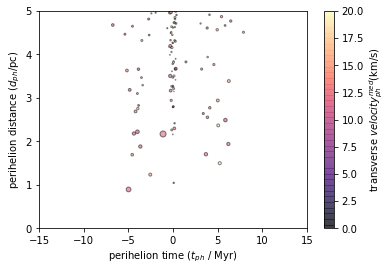

In [21]:
plt.scatter(tph/10**3, dph, s = 1000*area, alpha = .5, edgecolor = 'black', facecolor = 'none', c = v_tan6, vmin=0, vmax=20, cmap='magma')
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)
cbartitle = plt.colorbar()
cbartitle.set_label('transverse $velocity^{med}_{ph}$(km/s)')
plt.xlabel("perihelion time ($t_{ph}$ / Myr)")
plt.ylabel("perihelion distance ($d_{ph}$/pc)")

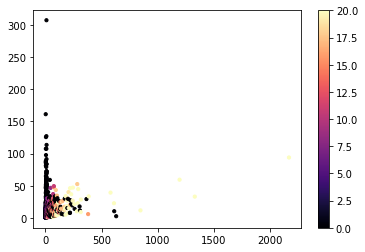

In [22]:
plt.scatter(dph, v_tan, s = 10, c = tph/10**3, vmin=0, vmax=20, cmap='magma')
plt.colorbar()

In [23]:
gliese_tan = (14.52**2 - (-14.53)**2)**.5
print(gliese_tan)
#explains why gliese 710 isnt present, it's an imaginary number

(3.300303837767214e-17+0.5389805191284562j)


In [24]:
max(area)

0.6876864515796708

# Radial Velocity

Text(0, 0.5, 'perihelion distance ($d_{ph}$/pc)')

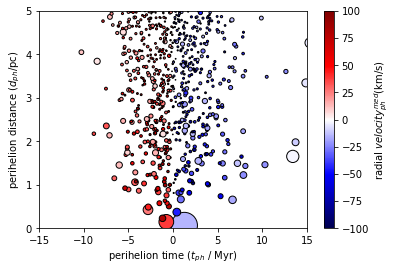

In [25]:
#colored with respect to radial velocity
plt.scatter(tph/10**3, dph, s = 1000*area, alpha = 1, edgecolor = 'black', facecolor = 'none', c = rv, vmin=-100, vmax=100, cmap='seismic')
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)
cbartitle = plt.colorbar()
cbartitle.set_label('radial $velocity^{med}_{ph}$(km/s)')
plt.xlabel("perihelion time ($t_{ph}$ / Myr)")
plt.ylabel("perihelion distance ($d_{ph}$/pc)")

# Mass

Text(0, 0.5, 'perihelion distance ($d_{ph}$/pc)')

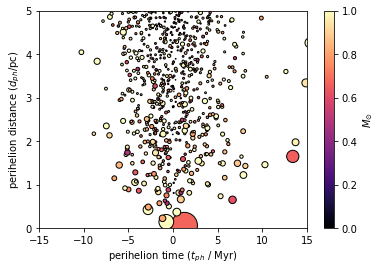

In [26]:
plt.scatter(tph/10**3, dph, s = 1000*area, alpha = 1, edgecolor = 'black', facecolor = 'none', c = Mass, vmin=0, vmax=1, cmap='magma')
cbartitle = plt.colorbar()
cbartitle.set_label('$M_{\odot}$')
#plt.scatter(tph/10**3, dph, s = 500*area, alpha = .5, edgecolor = 'black', facecolor = 'black', marker = 'x')
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)
plt.xlabel("perihelion time ($t_{ph}$ / Myr)")
#$X_{axis}$
plt.ylabel("perihelion distance ($d_{ph}$/pc)")


https://bit.ly/3xeA09R

For other astrometric symbols

Text(0, 0.5, 'perihelion distance ($d_{ph}$/pc)')

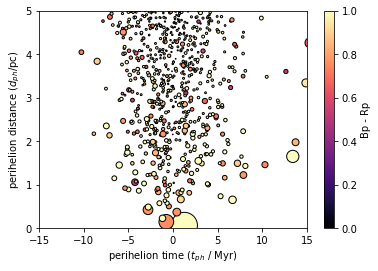

In [27]:
#colored with respect to BpRp (visible light)
plt.scatter(tph/10**3, dph, s = 1000*area, alpha = 1, edgecolor = 'black', facecolor = 'none', c = BpRp, vmin=0, vmax=1, cmap='magma')
xmin, xmax = plt.xlim(-15,15)
cbartitle = plt.colorbar()
cbartitle.set_label('Bp - Rp')
ymin, ymax = plt.ylim(0,5)
plt.xlabel("perihelion time ($t_{ph}$ / Myr)")
plt.ylabel("perihelion distance ($d_{ph}$/pc)")

In this plot gliese 710 dissapears entirely. This is likely because of its transverse velocity. If there is no transverse velocity than there would be nothing to color. Why are the objects with the highest transverse velocity positioned closest to t = 0?

# Derived Perhelion Values

In [50]:
 star7 = Table.read("/Users/edm/Desktop/New-For-Everett.fits", format='fits')

In [128]:
#turns each into usable arrays
#radial velocity
Rvel = np.asarray(star7["ADOPTEDRV"])
#print(Rvel)
#median x velocity
PMD = np.asarray(star7['PMDEC'])
#print(PMD)
#proper motion RA
PMR = np.asarray(star7['PMRA'])
pmtot = np.sqrt(PMR**2+PMD**2)
#parallax
plx = np.asarray(star7['plx'])
#median distance
Mass = np.asarray(star7["Mass"])
#print(Rp)
Bp_Rp = np.asarray(star7['PHOT_BP_MEAN_MAG']) -  np.asarray(star7['PHOT_RP_MEAN_MAG'])
#print(Bp)
vtan = (4.74/plx)*pmtot
vtot = (np.sqrt(vtan**2+rv**2))
c1 = 0.9779*10**9
c2 = 4.74047


In [129]:
t = -c1*(1/plx)*(rv/vtot**2)
d = 10**3*(1/plx)*(vtan/vtot)

Text(0, 0.5, 'd/pc')

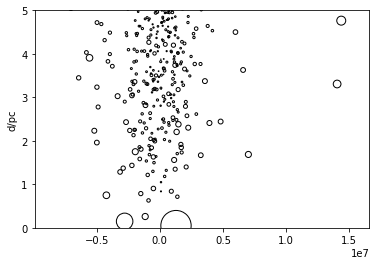

In [130]:
area = (Mass)/(d*vtot)
plt.scatter(t, d, s = 1000*area, facecolor = 'none', edgecolor = 'black')

#xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)

#plt.xlabel("t/Myr")
plt.ylabel("d/pc")

In [118]:
t

array([ 1280765.3628987686    ,                     nan,
       -1163300.9138130313    ,                     nan,
                           nan, -2794097.880961092     ,
         371511.7366900118    ,                     nan,
                           nan, -1511320.2530918955    ,
                           nan,  -898261.7424031734    ,
                           nan,                     nan,
                           nan,                     nan,
                           nan,    88965.0559971144    ,
                           nan,                     nan,
         909316.5447437079    ,                     nan,
                           nan,                     nan,
                           nan,  -511292.4649084176    ,
                           nan,                     nan,
                           nan,   -90308.63467227077   ,
                           nan,                     nan,
                           nan,                     nan,
                           nan,

In [119]:
d

array([ 0.05056849911956184,                  nan,  0.2595554795819408 ,
                        nan,                  nan,  0.14782369503640744,
        0.7033582960665081 ,                  nan,                  nan,
        0.7866041479405607 ,                  nan,  0.6291037909687435 ,
                        nan,                  nan,                  nan,
                        nan,                  nan,  0.8377083009156656 ,
                        nan,                  nan,  0.8404701371831448 ,
                        nan,                  nan,                  nan,
                        nan,  0.9040591677606099 ,                  nan,
                        nan,                  nan,  1.0577750837658144 ,
                        nan,                  nan,                  nan,
                        nan,                  nan,                  nan,
        1.0490284868407507 ,                  nan,  1.2157823146243305 ,
                        nan,                  nan, 

In [35]:
len(t)

3379

In [36]:
len(tph)

3379

Text(0.5, 0, 'd')

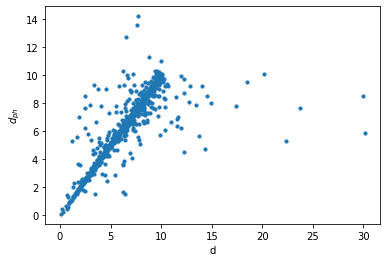

In [133]:
plt.scatter(d, dph, s = 10)
plt.ylabel("$d_{ph}$")
plt.xlabel("d")

Text(0.5, 0, 't')

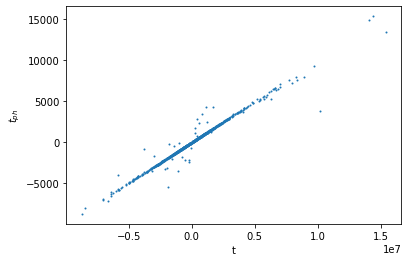

In [135]:
plt.scatter(t, tph, s = 1)
plt.ylabel("$t_{ph}$")
plt.xlabel("t")
#ymin, ymax = plt.ylim(0,30)
#xmin, xmax = plt.ylim(0,15)

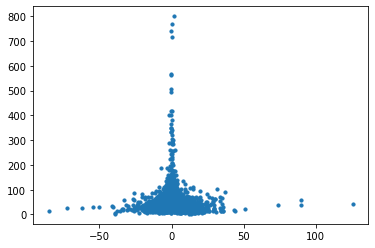

In [117]:
plt.scatter(tph/10**3, med_v, s = 10)

Text(0, 0.5, 'perihelion distance ($d_{ph}$/pc)')

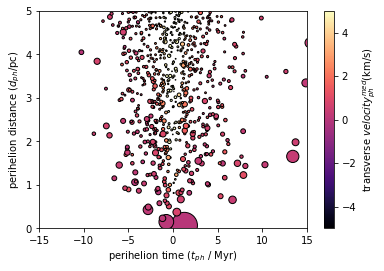

In [41]:
plt.scatter(tph/10**3, dph, s = 1000*area, alpha = 1, edgecolor = 'black', facecolor = 'none', c = Tvel, vmin=-5, vmax=5, cmap='magma')
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)
cbartitle = plt.colorbar()
#titles colorbar and axes
cbartitle.set_label('transverse $velocity^{med}_{ph}$(km/s)')
plt.xlabel("perihelion time ($t_{ph}$ / Myr)")
#$X_{axis}$
plt.ylabel("perihelion distance ($d_{ph}$/pc)")